In [48]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

from pandas import DataFrame
from numpy import array

nf1 = pd.read_csv('sales_train.csv')
nf2 = pd.read_csv('items.csv')

nf3 = nf1.drop(['date_block_num','shop_id','item_id','item_price','item_cnt_day'],axis=1)
nf3['item_sale'] = nf1.item_price*nf1.item_cnt_day


nf4 = nf3.groupby('date').sum().reset_index()

nf4['date']= pd.to_datetime(nf4['date'])

nf4 = nf4.sort_values('date')
nf4 = nf4.reset_index()
nf4 = nf4.drop('index',axis=1)
nf5 = nf4.drop('date',axis=1)

nf5_train = nf5[0:828]
nf5_test = nf5[828:1034]
nf5_test = nf5_test.reset_index()
nf5_test = nf5_test.drop('index',axis=1)
nf4


,date,item_sale
0,2013-01-01,1362942.00
1,2013-01-02,2536633.00
2,2013-01-03,2518542.40
3,2013-01-04,1823273.00
4,2013-01-05,2727292.98
...,...,...
1029,2015-12-06,2616036.44
1030,2015-12-07,2072214.98
1031,2015-12-08,1441878.35
1032,2015-12-09,3202689.34


## Univariate

In [68]:
#data prepration  
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)


b = nf5_train.iloc[:,0:].values




In [65]:
# univariate lstm example

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")


# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(b, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)

# demonstrate prediction
x_input = array([2072214.98, 1441878.35, 3202689.34])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[2665436.8]]


In [51]:
# printing Predictions
x_input = array([1.276154e+07, 6.072350e+06,4.757648e+06])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<206):
    
    if(len(temp_input)>3):
        x_input=array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[5692522.]
1 day input [6072350. 4757648. 5692522.]
1 day output [[5946743.]]
2 day input [4757648. 5692522. 5946743.]
2 day output [[5585066.5]]
3 day input [5692522.  5946743.  5585066.5]
3 day output [[5716514.5]]
4 day input [5946743.  5585066.5 5716514.5]
4 day output [[5983354.5]]
5 day input [5585066.5 5716514.5 5983354.5]
5 day output [[5988362.5]]
6 day input [5716514.5 5983354.5 5988362.5]
6 day output [[6011491.]]
7 day input [5983354.5 5988362.5 6011491. ]
7 day output [[6150099.5]]
8 day input [5988362.5 6011491.  6150099.5]
8 day output [[6248370.5]]
9 day input [6011491.  6150099.5 6248370.5]
9 day output [[6308299.5]]
10 day input [6150099.5 6248370.5 6308299.5]
10 day output [[6400020.]]
11 day input [6248370.5 6308299.5 6400020. ]
11 day output [[6501891.5]]
12 day input [6308299.5 6400020.  6501891.5]
12 day output [[6588531.]]
13 day input [6400020.  6501891.5 6588531. ]
13 day output [[6677303.5]]
14 day input [6501891.5 6588531.  6677303.5]
14 day output [[6774615

125 day output [[31944380.]]
126 day input [31064106. 31501166. 31944380.]
126 day output [[32393832.]]
127 day input [31501166. 31944380. 32393832.]
127 day output [[32849604.]]
128 day input [31944380. 32393832. 32849604.]
128 day output [[33311790.]]
129 day input [32393832. 32849604. 33311790.]
129 day output [[33780476.]]
130 day input [32849604. 33311790. 33780476.]
130 day output [[34255756.]]
131 day input [33311790. 33780476. 34255756.]
131 day output [[34737732.]]
132 day input [33780476. 34255756. 34737732.]
132 day output [[35226480.]]
133 day input [34255756. 34737732. 35226480.]
133 day output [[35722104.]]
134 day input [34737732. 35226480. 35722104.]
134 day output [[36224708.]]
135 day input [35226480. 35722104. 36224708.]
135 day output [[36734380.]]
136 day input [35722104. 36224708. 36734380.]
136 day output [[37251228.]]
137 day input [36224708. 36734380. 37251228.]
137 day output [[37775340.]]
138 day input [36734380. 37251228. 37775340.]
138 day output [[38306828

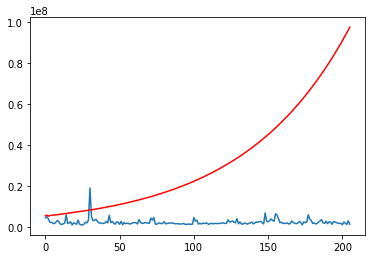

In [52]:
plt.plot(nf5_test)
plt.plot(lst_output, color='red')

## Multivariate

In [53]:
from datetime import datetime
nf6 = pd.merge(nf1,nf2).drop(['item_name'], axis=1)


nf6['item_sale'] = nf6.item_price*nf6.item_cnt_day
nf7 = nf6.groupby(["date","shop_id"]).sum().reset_index()


nf7 = nf7.drop(['date_block_num','item_id','item_price','item_cnt_day','item_category_id'],axis=1)
nf7['date'] = pd.to_datetime(nf7['date'], format="%d.%m.%Y")
nf7 = nf7.sort_values(by='date')

nf8 = pd.pivot_table(nf7, values='item_sale',index=['date'],columns=['shop_id'],aggfunc=np.sum,fill_value =0)
nf7

nf8['total_sale'] = nf8.sum(axis=1)

nf8

#Dataset containing each shop_id as columns,date as rows, and a total sale of the day column at last

shop_id,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,total_sale
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0,0,31886.0,0.0,0.0,0.0,0.0,59993.0,44516,0.0,...,41411.0,0.0,0.0,316557.0,0.0,0.0,0.0,0.0,0.0,1362942.00
2013-01-02,0,0,75023.8,37305.0,121572.0,0.0,146819.0,147332.0,97050,0.0,...,56035.0,69886.0,105339.0,519336.0,0.0,225158.0,0.0,0.0,143931.0,6020512.03
2013-01-03,110588,108409,110521.0,58891.0,101108.0,0.0,128532.0,124552.0,73278,0.0,...,31080.0,76037.0,76654.5,375070.0,0.0,168691.0,0.0,0.0,155045.0,5436480.11
2013-01-04,231122,45079,62854.0,23231.0,88356.0,0.0,121015.0,90173.0,80960,0.0,...,37426.0,72385.0,97633.0,284419.0,0.0,101474.0,0.0,0.0,84128.0,4755664.00
2013-01-05,167500,103025,50181.0,21771.0,52292.0,0.0,107611.0,101877.0,61110,0.0,...,47338.0,28667.0,92861.0,400557.0,0.0,93415.0,0.0,0.0,103285.0,4587231.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-10-27,0,0,7822.0,26808.0,18728.0,17955.0,82989.0,26457.0,0,0.0,...,0.0,19526.0,24200.0,0.0,41341.0,26407.0,84759.0,79933.0,32313.0,2261143.13
2015-10-28,0,0,18238.0,13497.0,22458.0,15732.0,41674.0,33288.0,0,0.0,...,0.0,8136.0,19654.0,0.0,46368.0,10079.0,76346.0,26890.0,40210.0,1722150.10
2015-10-29,0,0,40685.0,22784.0,16553.0,23880.0,49688.0,25034.0,0,0.0,...,0.0,40249.0,21557.0,0.0,39617.0,16158.0,75966.0,31488.0,17027.0,1859613.14


In [54]:
#To check if there are duplicates 
dupli = nf7[nf7.duplicated(['date','shop_id'])]
print(dupli, sep='\n')

Empty DataFrame
Columns: [date, shop_id, item_sale]
Index: []


In [55]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
from pandas import concat
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from math import sqrt

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# load dataset

values = nf8.values

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.iloc[:,61:121], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.000000   0.000000   0.047936   0.044448   0.000000        0.0   
2   0.000000   0.000000   0.112788   0.177724   0.240135        0.0   
3   0.335822   0.595118   0.166153   0.254841   0.199714        0.0   
4   0.701848   0.247464   0.094492   0.127443   0.174525        0.0   
5   0.508647   0.565562   0.075440   0.122227   0.103290        0.0   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  ...  var53(t-1)  var54(t-1)  \
1   0.000000   0.051144   0.396811    0.001695  ...    0.000000    0.000000   
2   0.091559   0.136723   0.858876    0.001695  ...    0.074325    0.212369   
3   0.080155   0.114402   0.649788    0.001695  ...    0.080867    0.154540   
4   0.075467   0.080716   0.717355    0.001695  ...    0.076983    0.196834   
5   0.067108   0.092184   0.542764    0.001695  ...    0.030488    0.187213   

   var55(t-1)  var56(t-1)  var57(t-1)  var58(t-1)  var59(t-1)  var60(t-1)  \
1    0.336086        

In [56]:
scaled

array([[0.        , 0.        , 0.04793626, ..., 0.        , 0.00924933,
        0.00476761],
       [0.        , 0.        , 0.11278806, ..., 0.        , 0.20179555,
        0.13652198],
       [0.33582241, 0.59511759, 0.16615327, ..., 0.        , 0.2166635 ,
        0.12000076],
       ...,
       [0.        , 0.        , 0.06116436, ..., 0.03548643, 0.03202749,
        0.01881755],
       [0.        , 0.        , 0.07495922, ..., 0.124189  , 0.03862269,
        0.04035123],
       [0.        , 0.        , 0.09598076, ..., 0.10474065, 0.06947295,
        0.05629283]])

In [57]:
print(scaler.data_max_)


[  329305.           182164.           665174.999999     267467.9999997
   506264.9999994    453221.          1603539.0000013   1028363.00000057
   113095.          2237366.99999983   317344.            64970.42
  3882145.9999994    167755.           678950.           769648.9999993
   544670.000001     558391.9999992   1559891.0000036    678938.
  1288510.           525345.9999992   1109920.00000205   113410.
   524409.000001    2268520.00000001   967694.           967758.00000013
  1040366.9999984    690775.9999999    926557.9999996   2177573.000004
    95766.           196117.00000001   141783.           982998.9999998
    59879.           550333.           868055.0000004    281518.
   105881.           737828.0000016   2319838.0000013   1229725.9999984
   320927.0000002    709859.9999989    846456.9999994    548838.
   293444.           275662.          1072066.000002     269142.
   940272.9999982    496017.9999994    949793.          2012560.99999887
   672921.9999991   1155257.99

In [58]:
print(scaler.data_min_)

[ 0.000000e+00  0.000000e+00  0.000000e+00 -1.244150e+04  0.000000e+00
  0.000000e+00  0.000000e+00  7.797000e+03 -5.990000e+02 -3.799000e+03
  0.000000e+00  0.000000e+00 -2.634400e+04  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 -5.999000e+03  0.000000e+00 -9.734000e+03  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00 -1.300000e+03  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00 -7.990000e+03 -2.750200e+04
  0.000000e+00  0.000000e+00  0.000000e+00  5.466000e+03  0.000000e+00
 -1.449000e+03  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00 -1.170800e+04 -3.471000e+03
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 -3.999000e+03
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 -6.914000e+03
  1.194405e+06]


In [59]:
values

array([[      0.        ,       0.        ,   31886.        , ...,
              0.        ,       0.        , 1362942.        ],
       [      0.        ,       0.        ,   75023.8       , ...,
              0.        ,  143931.        , 6020512.02999997],
       [ 110588.        ,  108409.        ,  110521.        , ...,
              0.        ,  155045.        , 5436480.10999999],
       ...,
       [      0.        ,       0.        ,   40685.        , ...,
          31488.        ,   17027.        , 1859613.14000001],
       [      0.        ,       0.        ,   49861.        , ...,
         110196.        ,   21957.        , 2620837.12000001],
       [      0.        ,       0.        ,   63844.        , ...,
          92939.        ,   45018.        , 3184379.07999998]])

In [60]:
train_X

array([[[0.        , 0.        , 0.04793626, ..., 0.        ,
         0.00924933, 0.00476761]],

       [[0.        , 0.        , 0.11278806, ..., 0.        ,
         0.20179555, 0.13652198]],

       [[0.33582241, 0.59511759, 0.16615327, ..., 0.        ,
         0.2166635 , 0.12000076]],

       ...,

       [[0.        , 0.        , 0.0358417 , ..., 0.06007607,
         0.05449396, 0.02602335]],

       [[0.        , 0.        , 0.03200511, ..., 0.06883949,
         0.0316061 , 0.01312185]],

       [[0.        , 0.        , 0.02999511, ..., 0.04233736,
         0.01909128, 0.01295864]]])

(828, 1, 61) (828,) (205, 1, 61) (205,)
Train on 828 samples, validate on 205 samples
Epoch 1/60
 - 2s - loss: 0.0410 - val_loss: 0.0262
Epoch 2/60
 - 0s - loss: 0.0308 - val_loss: 0.0356
Epoch 3/60
 - 0s - loss: 0.0333 - val_loss: 0.0300
Epoch 4/60
 - 0s - loss: 0.0300 - val_loss: 0.0225
Epoch 5/60
 - 0s - loss: 0.0290 - val_loss: 0.0206
Epoch 6/60
 - 0s - loss: 0.0273 - val_loss: 0.0230
Epoch 7/60
 - 0s - loss: 0.0256 - val_loss: 0.0260
Epoch 8/60
 - 0s - loss: 0.0256 - val_loss: 0.0247
Epoch 9/60
 - 0s - loss: 0.0249 - val_loss: 0.0219
Epoch 10/60
 - 0s - loss: 0.0248 - val_loss: 0.0215
Epoch 11/60
 - 0s - loss: 0.0244 - val_loss: 0.0225
Epoch 12/60
 - 0s - loss: 0.0241 - val_loss: 0.0224
Epoch 13/60
 - 0s - loss: 0.0239 - val_loss: 0.0210
Epoch 14/60
 - 0s - loss: 0.0238 - val_loss: 0.0208
Epoch 15/60
 - 0s - loss: 0.0235 - val_loss: 0.0213
Epoch 16/60
 - 0s - loss: 0.0234 - val_loss: 0.0209
Epoch 17/60
 - 0s - loss: 0.0233 - val_loss: 0.0206
Epoch 18/60
 - 0s - loss: 0.0231 - val_

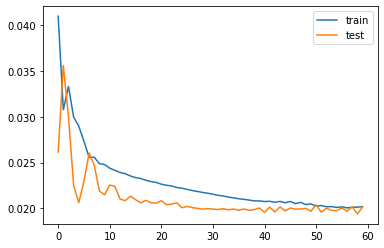

Test RMSE: 1698556.278


In [61]:
...
# split into train and test sets
values = reframed.values
#n_train_hours = 365 * 24
train = values[:828, :]
test = values[828:1034, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)



# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=60, batch_size=256, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((test_X[:, 1:],yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,60]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate(( test_X[:, 1:],test_y), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,60]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)


In [62]:
#Mean absolute error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(inv_y, inv_yhat)

712156.4788145702

In [63]:
#Mean Absolute percentage error
MAPE = np.mean(np.abs((inv_y - inv_yhat) / inv_y))*100
MAPE

23.89465255312225

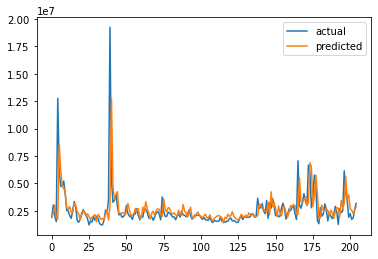

In [64]:
#Plot for actual vs predicted
pyplot.plot(inv_y, label='actual')
pyplot.plot(inv_yhat, label='predicted')
pyplot.legend()
pyplot.show()